   # Project: Stroke Prediction Based on Input Parameters

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient. Attribute Information:

    1. id: unique identifier
    2. gender: "Male", "Female" or "Other"
    3. age: age of the patient
    4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
    5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
    6. ever_married: "No" or "Yes"
    7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
    8. Residence_type: "Rural" or "Urban"
    9. avg_glucose_level: average glucose level in blood
    10.bmi: body mass index
    11.smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
    12.stroke: 1 if the patient had a stroke or 0 if not
    *Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [302]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns #Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

# set the plots to display in the Jupyter notebook
%matplotlib inline

plt.style.use('seaborn')

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [303]:
stroke = pd.read_csv('stroke-dataset.csv')

In [304]:
type(stroke)

pandas.core.frame.DataFrame

In [305]:
stroke.shape

(5110, 12)

In [306]:
stroke.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [307]:
stroke.value_counts()

id     gender  age   hypertension  heart_disease  ever_married  work_type      Residence_type  avg_glucose_level  bmi   smoking_status   stroke
77     Female  13.0  0             0              No            children       Rural           85.81              18.6  Unknown          0         1
49605  Male    63.0  0             0              Yes           Private        Urban           74.39              31.0  formerly smoked  0         1
49661  Male    53.0  0             0              Yes           Govt_job       Urban           85.17              29.2  never smoked     0         1
49646  Male    72.0  0             1              Yes           Self-employed  Rural           113.63             26.5  Unknown          0         1
49645  Male    58.0  0             0              No            Private        Rural           76.22              22.2  formerly smoked  0         1
                                                                                                               

In [308]:
stroke.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

In [309]:
stroke.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [310]:
pd.DataFrame(stroke.dtypes, columns=['DataType'])

,DataType
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [311]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [312]:
stroke[['age','avg_glucose_level','bmi']].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [313]:
print(stroke.index.name)

None


'''try:
    stroke.set_index('id', inplace = True)
    stroke[['gender']].head(10)

except: KeyError
'''

In [314]:
stroke.index

RangeIndex(start=0, stop=5110, step=1)

In [315]:
stroke.isna().sum() #returns the number of missing values in each column

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [316]:
stroke.loc[:,['age','avg_glucose_level','bmi']].apply(max, axis=0)

age                   82.00
avg_glucose_level    271.74
bmi                   97.60
dtype: float64

## Let Explore More About the Dataset

Let's compare the patients's stroke with the first two parameters of age, gender. 

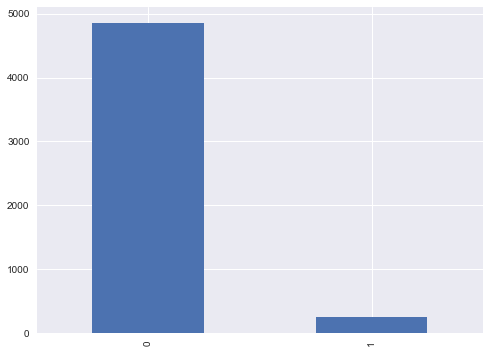

In [319]:
stroke['stroke'].value_counts().plot(kind='bar')
plt.show()

In [320]:
stroke[['gender','age','stroke']].head(10)

,gender,age,stroke
0,Male,67.0,1
1,Female,61.0,1
2,Male,80.0,1
3,Female,49.0,1
4,Female,79.0,1
5,Male,81.0,1
6,Male,74.0,1
7,Female,69.0,1
8,Female,59.0,1
9,Female,78.0,1


In [321]:
males = stroke[['age','gender','stroke']][stroke['gender'] == 'Male']
males.shape
#males.head()

(2115, 3)

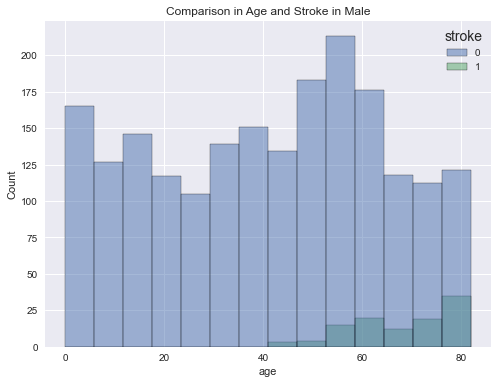

In [322]:
plt.title('Comparison in Age and Stroke in Male')
sns.histplot(males,x='age',hue='stroke')
plt.show()

In [323]:
females = stroke[['age','gender','stroke']][stroke['gender'] == 'Female']
females.shape

(2994, 3)

In [324]:
females.head()

,age,gender,stroke
1,61.0,Female,1
3,49.0,Female,1
4,79.0,Female,1
7,69.0,Female,1
8,59.0,Female,1


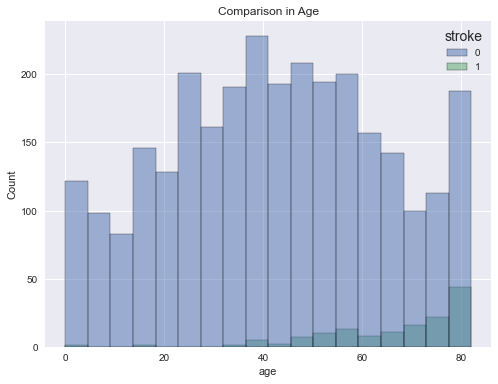

In [325]:
plt.title('Comparison in Age')
sns.histplot(females, x='age', hue='stroke')
plt.show()

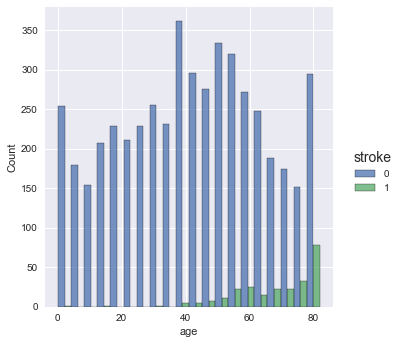

In [326]:
sns.displot(data=stroke, x="age", hue="stroke", multiple = 'dodge')

In [327]:
others = stroke[['age','gender']][stroke['gender'] == 'Other']
others.shape

(1, 2)

In [328]:
others

,age,gender
3116,26.0,Other


In [329]:
stroke.drop(3116, axis='rows',inplace=True)

Let's compare the patients's stroke with the others two parameters of average glucose level and bmi.

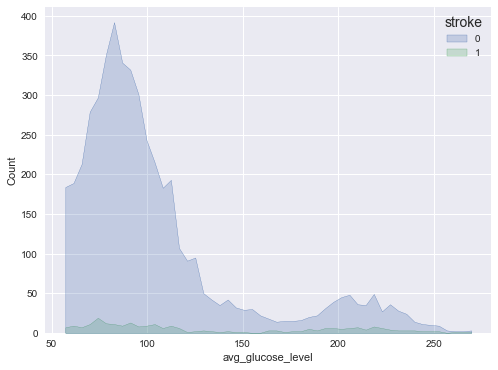

In [330]:
sns.histplot(data=stroke[['avg_glucose_level','stroke']],x='avg_glucose_level', hue='stroke',element='poly')
plt.show()

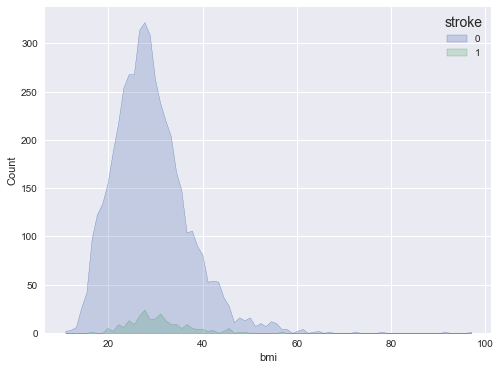

In [331]:
sns.histplot(data=stroke[['bmi','stroke']],x='bmi', hue='stroke',element='poly')
plt.show()

In [332]:
stroke['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [333]:
stroke['bmi'][stroke['gender'] == 'Male'].isna().sum()

104

In [334]:
stroke['bmi'][stroke['gender'] == 'Female'].isna().sum()

97

In [335]:
male_bmi = stroke['bmi'][stroke['gender'] == 'Male']
female_bmi = stroke['bmi'][stroke['gender'] == 'Female']
male_bmi_mean = male_bmi.mean()
female_bmi_mean = female_bmi.mean()

In [336]:
male_bmi.isna().sum()

104

In [337]:
female_bmi.isna().sum()

97

In [338]:
male_bmi.fillna(male_bmi_mean,inplace=True)
female_bmi.fillna(female_bmi_mean,inplace=True)

In [339]:
new_bmi = pd.concat([male_bmi,female_bmi])

In [340]:
stroke['bmi'] = new_bmi

In [341]:
stroke.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

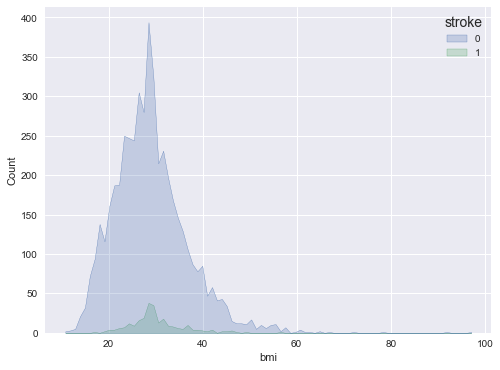

In [342]:
sns.histplot(stroke,x='bmi', hue='stroke',element='poly')
plt.show()

<AxesSubplot:xlabel='age', ylabel='bmi'>

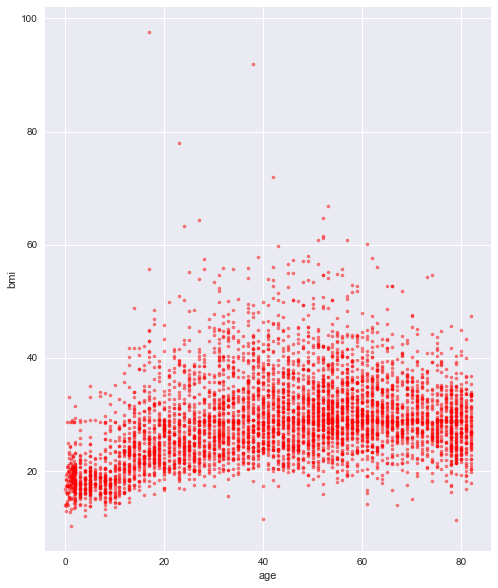

In [343]:
stroke.plot(kind='scatter', x='age', y='bmi', \
        color='red', figsize=(8,10), s=10, alpha=0.5)

Comparison on patients' types of work and residence respectively.

<Figure size 720x720 with 0 Axes>

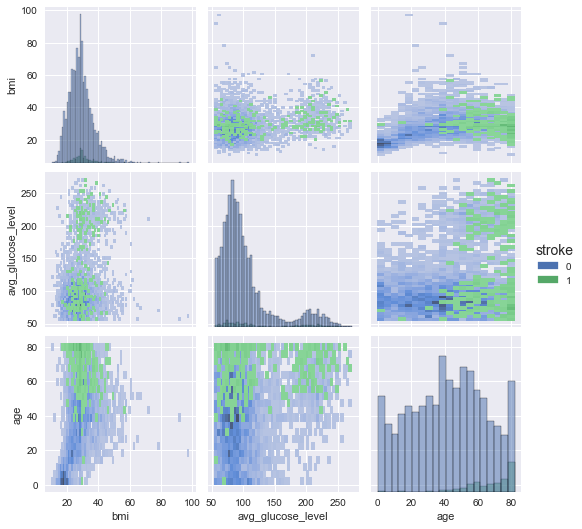

In [345]:
plt.figure(figsize=(10,10))
sns.pairplot(data=stroke[['bmi','avg_glucose_level','age','stroke']],hue='stroke',kind='hist')
plt.show()

In [317]:

cat_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
num_cols = ['age', 'avg_glucose_level', 'bmi']

stroke[cat_cols] = stroke[cat_cols].astype('category')
stroke.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   category
 4   heart_disease      5110 non-null   category
 5   ever_married       5110 non-null   category
 6   work_type          5110 non-null   category
 7   Residence_type     5110 non-null   category
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                4909 non-null   float64 
 10  smoking_status     5110 non-null   category
 11  stroke             5110 non-null   category
dtypes: category(8), float64(3), int64(1)
memory usage: 200.9 KB


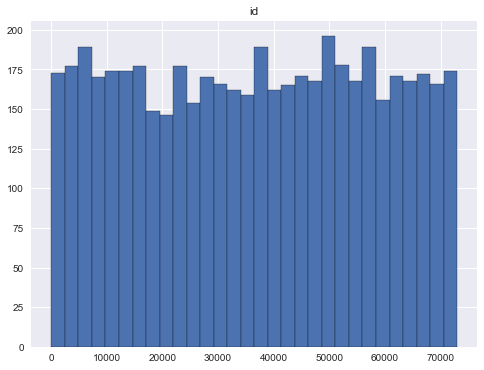

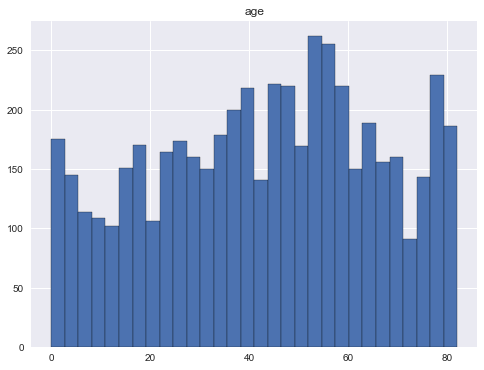

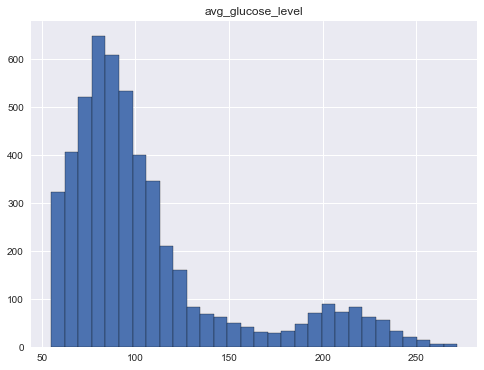

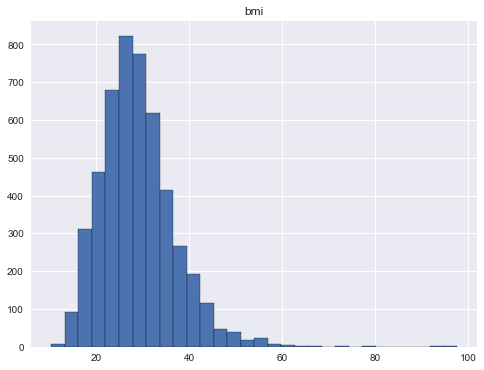

In [318]:
#patient_id = stroke.pop('id') # remove patient id 

for column in stroke.columns:
    if stroke[column].dtype.name != 'category':
        plt.hist(stroke[column], bins=30, edgecolor='black')
        plt.title(column)
        plt.show()


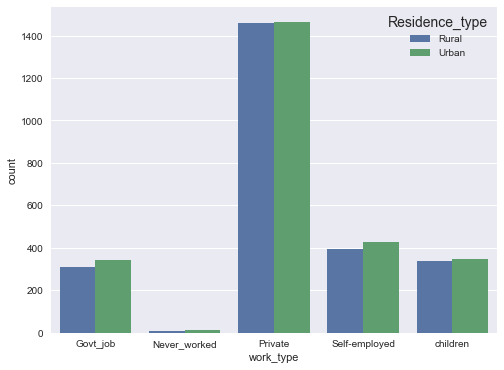

In [344]:
sns.countplot(data=stroke[['work_type','Residence_type']],x='work_type',hue='Residence_type')
plt.show()

Comparison on patients' status of smoking, heart diseases and hypertension.

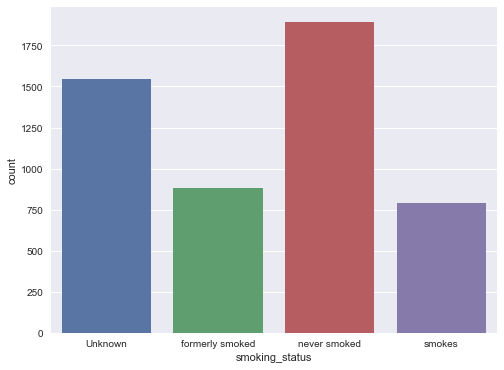

In [346]:
sns.countplot(data=stroke[['smoking_status']],x='smoking_status')
plt.show()

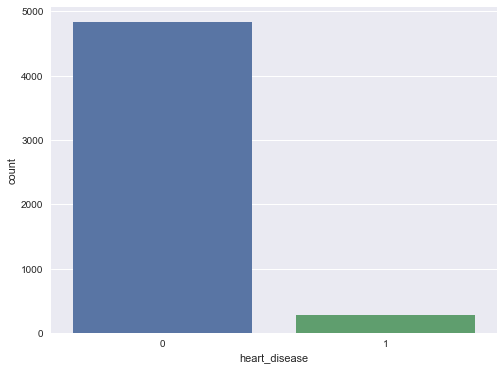

In [347]:
sns.countplot(data=stroke[['heart_disease']],x='heart_disease')
plt.show()

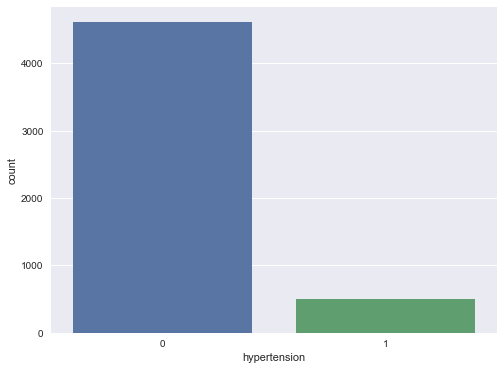

In [348]:
sns.countplot(data=stroke[['hypertension']],x='hypertension')
plt.show()

In [349]:
stroke.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.065758,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,29.065758,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


In [351]:
stroke_dict = stroke.set_index('id').to_dict()['smoking_status']

In [352]:
stroke_dict

{9046: 'formerly smoked',
 51676: 'never smoked',
 31112: 'never smoked',
 60182: 'smokes',
 1665: 'never smoked',
 56669: 'formerly smoked',
 53882: 'never smoked',
 10434: 'never smoked',
 27419: 'Unknown',
 60491: 'Unknown',
 12109: 'never smoked',
 12095: 'smokes',
 12175: 'smokes',
 8213: 'Unknown',
 5317: 'never smoked',
 58202: 'never smoked',
 56112: 'smokes',
 34120: 'smokes',
 27458: 'never smoked',
 25226: 'Unknown',
 70630: 'smokes',
 13861: 'never smoked',
 68794: 'never smoked',
 64778: 'Unknown',
 4219: 'formerly smoked',
 70822: 'never smoked',
 38047: 'formerly smoked',
 61843: 'Unknown',
 54827: 'smokes',
 69160: 'formerly smoked',
 43717: 'smokes',
 33879: 'Unknown',
 39373: 'never smoked',
 54401: 'formerly smoked',
 14248: 'never smoked',
 712: 'formerly smoked',
 47269: 'formerly smoked',
 24977: 'formerly smoked',
 47306: 'Unknown',
 62602: 'never smoked',
 4651: 'formerly smoked',
 1261: 'never smoked',
 61960: 'smokes',
 1845: 'formerly smoked',
 7937: 'smokes'

In [353]:
id = 5111
def get_patient_id(stroke_dict,id):
    #key, value = contacts.items:
        if id in stroke_dict.keys():
            print("The patients' smoking status", id, "is", stroke_dict[id])
            return

        else:
            print("The patients' smoking status ",id, "is unavailable")

In [354]:
get_patient_id(stroke_dict,id)

The patients' smoking status 5111 is never smoked


In [355]:
stroke_dict2 = stroke.set_index('id').to_dict()['bmi']

In [356]:
stroke_dict2

{9046: 36.6,
 51676: 29.065757680359038,
 31112: 32.5,
 60182: 34.4,
 1665: 24.0,
 56669: 29.0,
 53882: 27.4,
 10434: 22.8,
 27419: 29.065757680359038,
 60491: 24.2,
 12109: 29.7,
 12095: 36.8,
 12175: 27.3,
 8213: 28.647936350074616,
 5317: 28.2,
 58202: 30.9,
 56112: 37.5,
 34120: 25.8,
 27458: 37.8,
 25226: 28.647936350074616,
 70630: 22.4,
 13861: 48.9,
 68794: 26.6,
 64778: 32.5,
 4219: 27.2,
 70822: 23.5,
 38047: 28.2,
 61843: 28.647936350074616,
 54827: 28.3,
 69160: 28.647936350074616,
 43717: 44.2,
 33879: 25.4,
 39373: 22.2,
 54401: 30.5,
 14248: 29.7,
 712: 26.5,
 47269: 33.7,
 24977: 23.1,
 47306: 32.0,
 62602: 29.9,
 4651: 23.9,
 1261: 28.5,
 61960: 26.4,
 1845: 29.065757680359038,
 7937: 20.2,
 19824: 33.6,
 37937: 29.065757680359038,
 47472: 38.6,
 35626: 33.7,
 36338: 39.2,
 18587: 29.065757680359038,
 15102: 28.647936350074616,
 59190: 27.7,
 47167: 31.4,
 8752: 29.065757680359038,
 25831: 36.5,
 38829: 33.2,
 66400: 28.647936350074616,
 58631: 32.8,
 5111: 27.7,
 1071

In [357]:
id = 5111
def get_patient_bmi(stroke_dict2,id):
    #key, value = contacts.items:
        if id in stroke_dict2.keys():
            print("The patients' body mass index", id, "is", stroke_dict2[id])
            return

        else:
            print("The patients' body mass index ",id, "is unavailable")

In [370]:
get_patient_bmi(stroke_dict2,id)

The patients' body mass index 5111 is 27.7
